In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import operator

In [ ]:
df  = load_digits()

In [ ]:
X= df.data
Y= df.target

In [ ]:
X_test = X[1348:]
X_train = X[:1348]
Y_test = Y[:449]
Y_train = Y[449:]

In [ ]:
X_train.shape

(1348, 64)

In [ ]:
Y_test.shape

(449,)

In [67]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [68]:
class KNN:
  def __init__(self, K=3):
    self.K = K

In [91]:
class KNN:
  def __init__(self, K):
    self.K = K
  def fit(self, x_train, y_train):
    self.X_train = x_train
    self.Y_train = y_train  

  def predict(self, X_test):
    predictions = []
    for i in range(len(X_test)):
      dist = np.array([euc_dist(X_test[i], xt ) for xt  in self.X_train])
      dist_sorted = dist.argsort()[:self.K]
      neigh_count = {}
      for idx in dist_sorted:
        if self.Y_train[idx] in neigh_count:
          neigh_count[self.Y_train[idx]] +=1
        else:
          neigh_count[self.Y_train[idx]] = 1
      sorted_neighbor_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
      predictions.append(sorted_neighbor_count[0][0])
    return predictions      

In [82]:
model2 = KNN(K=k)

In [71]:
model2

In [ ]:
#now lets test our model
mnist = load_digits()

In [ ]:
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
mnist.data.shape

(1797, 64)

In [ ]:
#setting target and features
X = mnist.data
y = mnist.target

In [ ]:
X_test = X[1348:]
X_train = X[:1348]
y_test = y[:449]
y_train = y[449:]

In [ ]:
print('Unique values in y_train', np.unique(y_train))
print('Unique values in y_test', np.unique(y_test))

Unique values in y_train [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test [0 1 2 3 4 5 6 7 8 9]


Using Cross-validation here to get better predictions and most accurate k balues for best fit

In [54]:
model == y_test

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [92]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.12249443207126949
K = 5; Accuracy: 0.1403118040089087
K = 7; Accuracy: 0.1403118040089087
K = 9; Accuracy: 0.1291759465478842
K = 11; Accuracy: 0.14253897550111358
K = 13; Accuracy: 0.1358574610244989
K = 15; Accuracy: 0.1403118040089087
K = 17; Accuracy: 0.1403118040089087
K = 19; Accuracy: 0.15367483296213807
K = 21; Accuracy: 0.15367483296213807
K = 23; Accuracy: 0.1603563474387528
K = 25; Accuracy: 0.1492204899777283
K = 27; Accuracy: 0.1514476614699332
K = 29; Accuracy: 0.1492204899777283
K = 31; Accuracy: 0.155902004454343
K = 33; Accuracy: 0.155902004454343
K = 35; Accuracy: 0.14699331848552338
K = 37; Accuracy: 0.16258351893095768
K = 39; Accuracy: 0.155902004454343
K = 41; Accuracy: 0.16481069042316257
K = 43; Accuracy: 0.1603563474387528
K = 45; Accuracy: 0.1603563474387528
K = 47; Accuracy: 0.1492204899777283
K = 49; Accuracy: 0.1492204899777283
K = 51; Accuracy: 0.155902004454343
K = 53; Accuracy: 0.1492204899777283


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


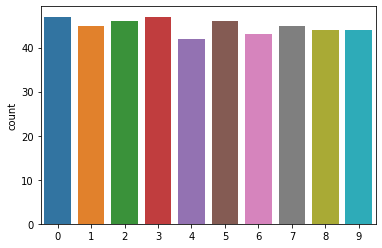

In [95]:
sns.countplot(y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


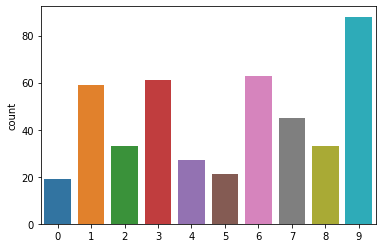

In [96]:
sns.countplot(pred)